Задание: реализовать K-Means для кластеризации

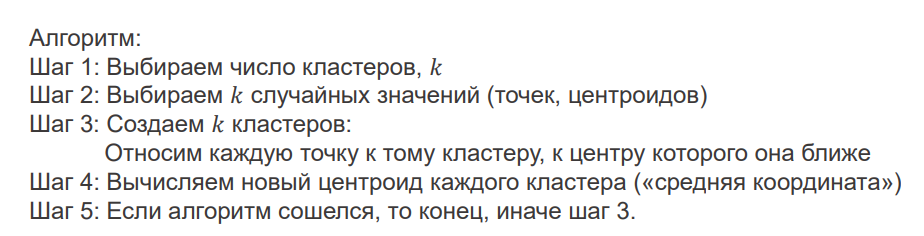

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("Mall_Customers.csv", sep=',')
X =X.drop(columns = ['CustomerID', 'Gender', 'Age'])
X.rename(columns = {'Annual Income (k$)':'Input1', 'Spending Score (1-100)':'Input2'}, inplace = True )
X

,Input1,Input2
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


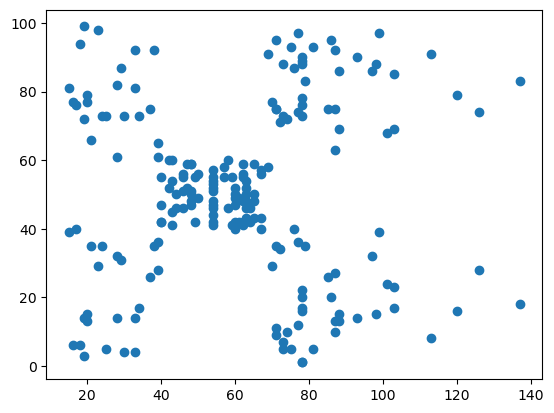

In [3]:
plt.scatter(X['Input1'], X['Input2'])

In [4]:
k = 5 # задаем число кластеров
centroids = X.sample(n=k) #выбираем центроиды
centroids

,Input1,Input2
11,19,99
174,88,13
38,37,26
42,39,36
7,18,94


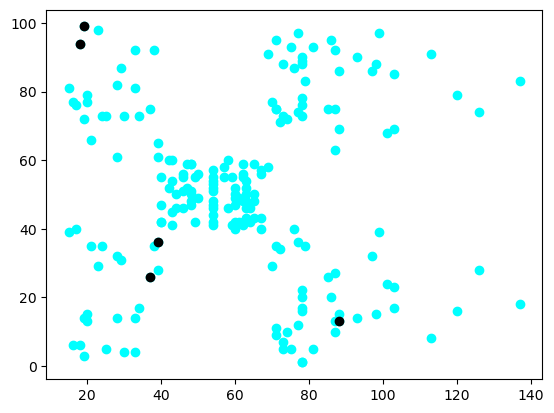

In [5]:
plt.scatter(X['Input1'], X['Input2'], c='aqua')
plt.scatter(centroids['Input1'], centroids['Input2'], c='k')

In [6]:
diff = 1
j = 0
while (diff != 0):
    XD = X
    i = 1
    #поиск расстояний от точки до центроида
    for index1, row_c in centroids.iterrows(): #для координат каждого центроида
        ED = [] #евклидово расстояние
        for index2, row_d in XD.iterrows():
            d1 = (row_c['Input1'] - row_d['Input1']) ** 2
            d2 = (row_c['Input2'] - row_d['Input2']) ** 2
            d = np.sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X['Cluster'] = C
    centroids_new = X.groupby(['Cluster']).mean()[['Input1', 'Input2']]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (centroids_new['Input2'] - centroids['Input2']).sum() - (centroids_new['Input1'] - centroids['Input1']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[['Input1', 'Input2']]

-24.615138857502078
-4.915714903390658
-2.583502024291505
0.0


In [7]:
centroids

,Input1,Input2
Cluster,,
1,86.538462,82.128205
2,87.750000,17.583333
3,26.304348,20.913043
4,55.087500,49.712500
5,25.727273,79.363636


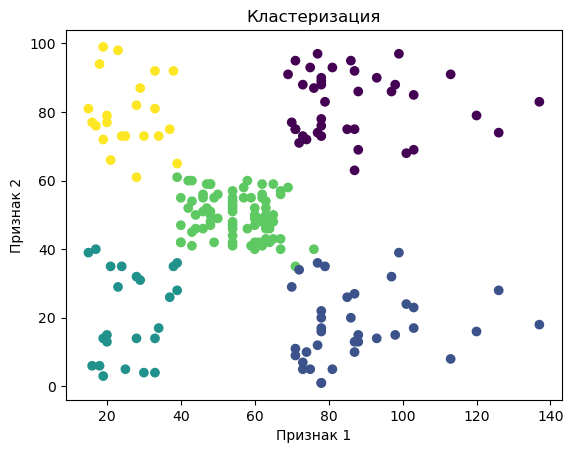

In [8]:
# Визуализация данных
y = X.Cluster
plt.scatter(X['Input1'], X['Input2'], c=y)
plt.title("Кластеризация")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()